# Определение моментов инерции твёрдых тел с помощью трифилярного подвеса.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# TODO: Setup font

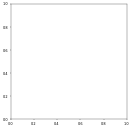

In [2]:
figure, axes = plt.subplots(figsize=(6, 6), dpi=25)

In [3]:
axes.minorticks_on()
axes.grid(which='major', linestyle='--', linewidth=0.5) # '-', '--', '-.', ':', '',

axes.set_ylabel('Название оси Y')
axes.set_xlabel('Название оси X')
axes.set_title('Рис 1. Название', wrap=True)

Text(0.5, 1.0, 'Рис 1. Название')

In [4]:
R = 114.6 / 1e3  # От центра до нити
r = 30.2  / 1e3  
sigma_R, sigma_r = 0.5 / 1e3 , 0.3 / 1e3
L = 2143  / 1e3 
sigma_L = 0.5 / 1e3
z0 = np.sqrt( np.square(L) - np.square(R  - r) )
print(f'z0 = {z0}')

z0 = 2.141337348481084


In [5]:
sigma_z0 = 0.5 / 1e3 # TODO: Написать/вычислить нормальное значение, хотя эта погрешность вообще не влияет
g = 9.815
four_pi_sq  = 4 * np.square(np.pi)
k = g * R * r / (four_pi_sq * z0)
print(f'k = {k}')

sigma_k = np.sqrt(
    np.square( g * r * sigma_R      / (four_pi_sq * z0) ) +\
    np.square( g * R * sigma_r      / (four_pi_sq * z0) ) +\
    np.square( g * R * r * sigma_z0 / (four_pi_sq * np.square(z0)) )
)
epsilon_k = (sigma_k / k) * 1e2
print(f'sigma_k = {sigma_k}, epsilon_k = {epsilon_k}%')  # Наибольшую погрешность вносит sigma_r

k = 0.0004018250763758491
sigma_k = 4.360685049769217e-06, epsilon_k = 1.0852197401663475%


### Определим моменты инерции

In [6]:
def calculate_I(mass, period):
    ''' Рассчитать момент инерции тела на трифилярном подвесе '''
    return k * m * np.square(T)

In [7]:
m = 965.7     / 1e3  # Масса одного лишь подвеса
sigma_m = 0.5 / 1e3
N = 9
t_plat = 39.337
T_plat = t_plat / N
# print(T_plat)
I_plat = k * m * np.square(T_plat)
print(f'I_plat = {I_plat}')

I_plat = 0.00741304642607989


In [8]:
M_disk = 584.7 / 1e3
t_disk = 35.183
T_disk = t_disk / N
# print(T_disk)
I_disk = k * (M_disk + m) * np.square(T_disk) - I_plat
print(f'I_disk = {I_disk}')

I_disk = 0.0021074920691102426


In [9]:
M_rod = 1273.0 / 1e3
t_rod = 33.171
T_rod = t_rod / N
I_rod = k * (M_rod + m) * np.square(T_rod) - I_plat
print(f'I_rod = {I_rod}')

I_rod = 0.0048067802202504065


In [10]:
M_disk_rod = M_disk + M_rod
t_disk_rod = 31.956
T_disk_rod = t_disk_rod / N
I_disk_rod = k * (M_disk_rod + m) * np.square(T_disk_rod) - I_plat
print(f'I_disk_rod = {I_disk_rod}')

print(f'I_disk + I_rod = {I_disk + I_rod}')

I_disk_rod = 0.0068900231883326415
I_disk + I_rod = 0.006914272289360649


### Рассчитаем погрешности моментов инерции

### Зависимость I от h

[0.00187216 0.00199957 0.002473   0.00321364 0.00444065 0.00543902
 0.00697545]
I_разрезанного_диска = 0.0019212027766010813, m_раз_диска = 1.4247339204758986
m_раз_диска по данным измерений = 1.5367


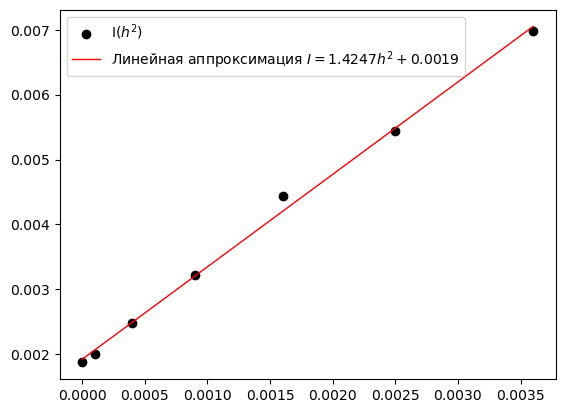

In [11]:
M = (770.7 + 766) / 1e3
h_s = np.array([0.0,    10.0,   20.0,   30.0,   40.0,   50.0,     60.0])  # TODO: Find out how to set the type to floar
h_s /= 1e3
t_s = np.array([27.349, 27.536, 28.220, 29.258, 30.901, 32.176, 34.045])
I_s = []
for h, t in zip(h_s, t_s):
    T = t / N
    I = k * (M + m) * np.square(T) - I_plat
    I_s.append(I)
I_s = np.array(I_s)
print(I_s)

h_sq = h_s * h_s

plt.scatter(h_sq, I_s, marker='o', color=[0,0,0], label=f'I($h^2$)')

(k, b) = np.polyfit(h_sq, I_s, 1)
x = np.array([min(h_sq), max(h_sq)])
plt.plot(x, k * x + b, '-r', linewidth=1, label=f'Линейная аппроксимация $I = {k:.4f}h^2 + {b:.4f}$')

plt.legend()

print(f'I_разрезанного_диска = {b}, m_раз_диска = {k}')
print(f'm_раз_диска по данным измерений = {M}')